In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import mplfinance as mpf

In [158]:
data = pd.read_csv(r'C:\Users\Admin\Documents\sales_data_1_5C.csv')
data.head()

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1


In [159]:
data.shape

(70, 6)

In [160]:
data.isnull().sum()

Date                0
Firm bought from    0
Buying price        0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

### 1. What is their overall gross margin for their business?

In [167]:
# Calculate Total Revenue
data['Revenue'] = data['Selling price'] * data['Quantity sold']
total_revenue = data['Revenue'].sum()

# Calculate Total Cost
data['Cost'] = data['Buying price'] * data['Quantity sold']
total_cost = data['Cost'].sum()

# Calculate Overall Gross Margin
overall_gross_margin = ((total_revenue - total_cost) / total_cost)

print("Overall Gross Margin: {:.2%}".format(overall_gross_margin))

Overall Gross Margin: 32.69%


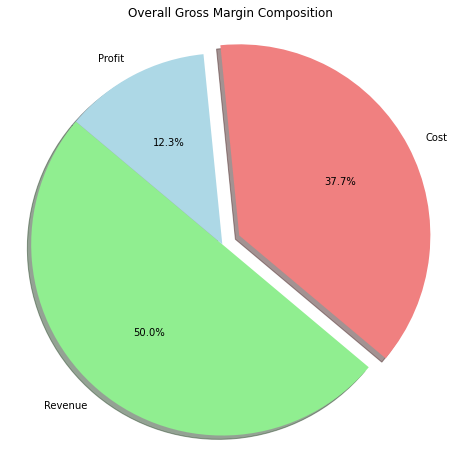

In [153]:
labels = ['Revenue', 'Cost', 'Profit']
sizes = [total_revenue, total_cost, total_revenue - total_cost]
colors = ['lightgreen', 'lightcoral', 'lightblue']
explode = (0, 0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Overall Gross Margin Composition')
plt.axis('equal')  

plt.show()

#### Inference
The output indicates that the overall gross margin for the branch is 32.69%. This means that, on average, the branch is making a profit of 32.69% on the Sapota products it sells. In other words, for every Rs. 100 of cost, the branch generates Rs. 132.69 in revenue, resulting in a profit of Rs. 32.69.

Profitability: The branch is generally profitable, with a gross margin percentage well above zero. This suggests that their business model is successful in generating profit from their operations.

### 2. Which vendor is the most profitable?

In [31]:
# Calculate Profit for each transaction
data['Profit'] = data['Selling price'] - data['Buying price']

vendor_profit = data.groupby('Firm bought from')['Profit'].sum()

# Find the vendor with the highest profit
most_profitable_vendor = vendor_profit.idxmax()
highest_profit = vendor_profit.max()

print("The most profitable vendor is '{}' with a total profit of {:.2f}".format(most_profitable_vendor, highest_profit))

The most profitable vendor is 'Vendor7' with a total profit of 224.98


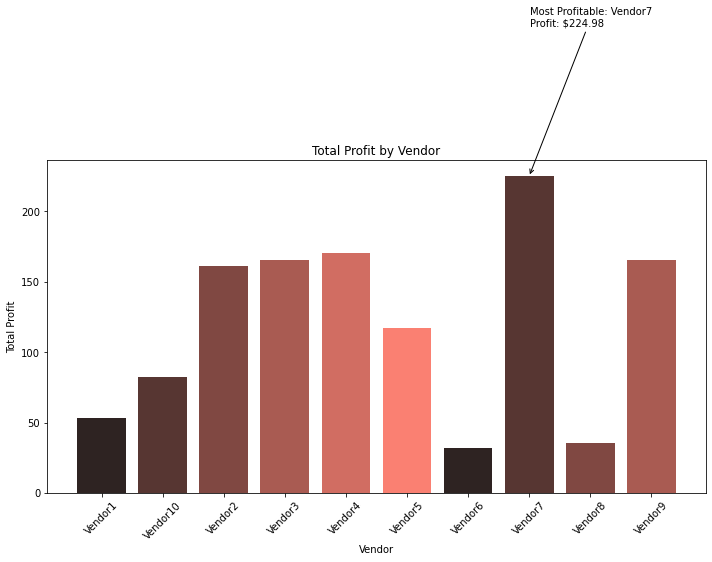

In [65]:
dark_pastel_palette = sns.color_palette("dark:salmon")

plt.figure(figsize=(10, 6))
plt.bar(vendor_profit.index, vendor_profit.values, color=dark_pastel_palette)
plt.xlabel('Vendor')
plt.ylabel('Total Profit')
plt.title('Total Profit by Vendor')
plt.xticks(rotation=45)
plt.tight_layout()

plt.annotate(f"Most Profitable: {most_profitable_vendor}\nProfit: ${highest_profit:.2f}", 
             xy=(most_profitable_vendor, highest_profit), xytext=(1, 150),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.show()

#### Inference:

The analysis reveals that 'Vendor7' is the most profitable among all the vendors. 
This vendor has generated the highest total profit of $224.98 for SYA during the specified period.
This suggests that 'Vendor7' is a significant contributor to the company's overall profitability. 
SYA may want to continue building a strong relationship with 'Vendor7' or consider strategies to expand its business with this vendor further.

### 3. Which customer is the least profitable?

In [23]:
customer_profit = data.groupby('Customer')['Profit'].sum()

# Find the customer with the lowest profit
least_profitable_customer = customer_profit.idxmin()
lowest_profit = customer_profit.min()

print("The least profitable customer is '{}' with a total profit of {:.2f}".format(least_profitable_customer, lowest_profit))

The least profitable customer is 'Customer9' with a total profit of 57.62


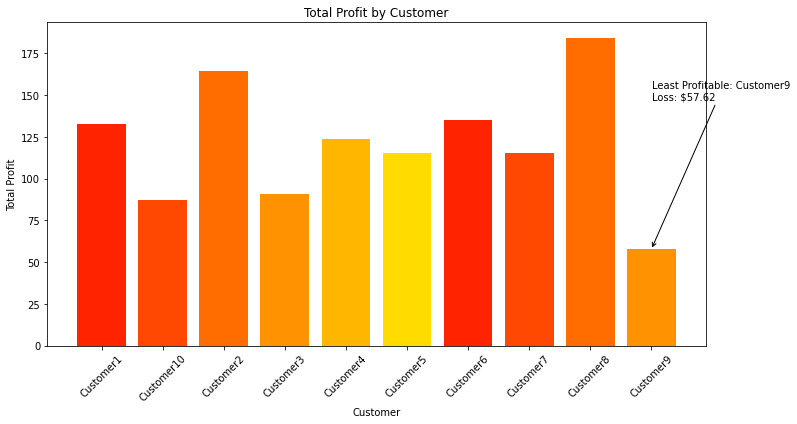

In [96]:
custom_dark_pastel_palette = sns.color_palette("autumn")

plt.figure(figsize=(10, 6))
plt.bar(customer_profit.index, customer_profit.values, color=custom_dark_pastel_palette)
plt.xlabel('Customer')
plt.ylabel('Total Profit')
plt.title('Total Profit by Customer')
plt.xticks(rotation=45)
plt.tight_layout()

plt.annotate(f"Least Profitable: {least_profitable_customer}\nLoss: ${abs(lowest_profit):.2f}", 
             xy=(least_profitable_customer, lowest_profit), xytext=(1, 150),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

plt.show()

#### Inference:

The analysis indicates that 'Customer9' is the least profitable among all the customers. This customer has generated the highest loss (negative profit) of $57.62 for SYA during the specified period.
It's essential for SYA to further examine their relationship with 'Customer9' and the specific transactions with this customer. They may need to consider strategies to either improve the profitability of this customer or, if not feasible, manage their relationship differently.

### 4. Which day of the week was most profitable for them?

In [84]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.dayofweek

day_profit = data.groupby('Day_of_Week')['Profit'].sum()

# Find the day of the week with the highest total profit
most_profitable_day = day_profit.idxmax()

day_name = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
most_profitable_day_name = day_name[most_profitable_day]

print("The most profitable day of the week was '{}' with a total profit of {:.2f}".format(most_profitable_day_name, 
                                                                                          day_profit[most_profitable_day]))

The most profitable day of the week was 'Monday' with a total profit of 222.88


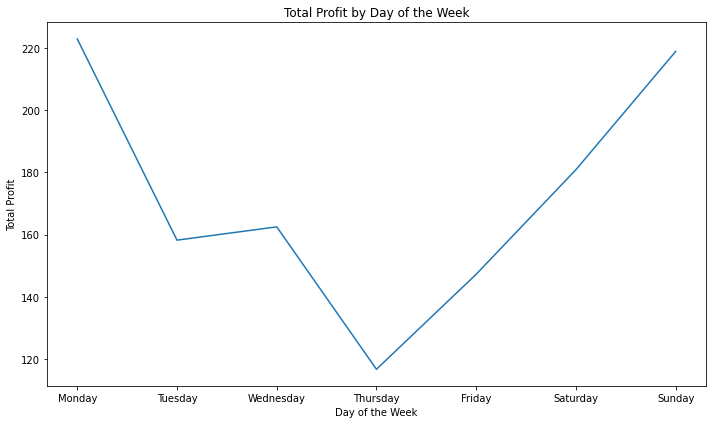

In [85]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_profit, markers=True)
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit')
plt.title('Total Profit by Day of the Week')
plt.xticks(range(7), [day_name[day] for day in range(7)])
plt.tight_layout()

plt.show()

#### Inference:

Based on the analysis, Monday stands out as the most profitable day of the week for SYA. On this day, the company generated the highest total profit of $222.88.
This information can help SYA in several ways. They may want to allocate more resources or focus their marketing and sales efforts on Mondays to maximize profitability. Additionally, understanding the most profitable day of the week can assist in inventory management and staffing decisions.

### 5. Which day of the week was the least profitable for them?

In [25]:
# Find the day of the week with the lowest total profit
least_profitable_day = day_profit.idxmin()

day_name = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
least_profitable_day_name = day_name[least_profitable_day]

print("The least profitable day of the week was '{}' with a total profit of {:.2f}".format(least_profitable_day_name, 
                                                                                           day_profit[least_profitable_day]))

The least profitable day of the week was 'Thursday' with a total profit of 116.69


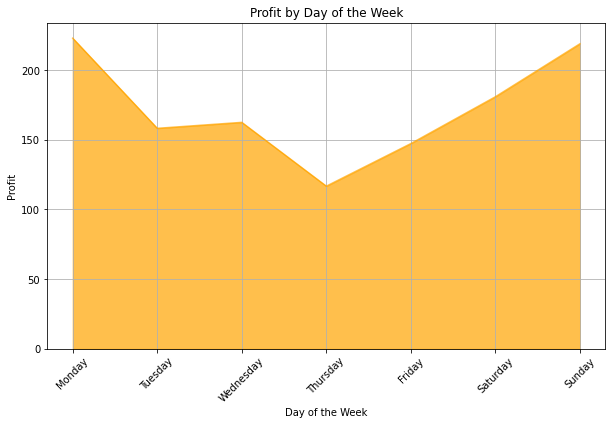

In [118]:
plt.figure(figsize=(10, 6))
day_profit.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\
    .plot(kind='area', color='orange', alpha=0.7)
plt.title("Profit by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Inference:

Thursday is the least profitable day of the week, with a total profit of 116.69. This suggests that, among the days of the week, Thursday had the lowest overall profitability for SYA.

In [119]:
data2 = pd.read_csv(r'C:\Users\Admin\Documents\sales_data_2_5C.csv')
data2.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [120]:
data2.shape

(70, 7)

In [121]:
data2.isnull().sum()

Date                0
Firm bought from    0
Buying price        0
Quantity bought     0
Customer            0
Selling price       0
Quantity sold       0
dtype: int64

### 6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2.csv? 

In [122]:
data2['Profit'] = (data2['Selling price'] - data2['Buying price']) * data2['Quantity sold']

data2['Date'] = pd.to_datetime(data2['Date'])

data2 = data2.sort_values(by='Date')

# Calculate the 3-day rolling average of daily gross profit
data2['3-Day Avg Profit'] = data2['Profit'].rolling(window=3).mean()
print(data2[['Date', 'Profit', '3-Day Avg Profit']])

         Date   Profit  3-Day Avg Profit
0  2023-08-21   856.68               NaN
1  2023-08-21   146.71               NaN
2  2023-08-21   297.45        433.613333
3  2023-08-21    87.64        177.266667
4  2023-08-21    42.01        142.366667
..        ...      ...               ...
64 2023-08-27  1164.87        427.866667
65 2023-08-27   407.34        552.863333
66 2023-08-27    84.00        552.070000
67 2023-08-27   947.84        479.726667
69 2023-08-27    25.88        352.573333

[70 rows x 3 columns]


#### Inference
The output shows the daily profit and the 3-day rolling average of profit for a specific date range (from August 21, 2023, to August 27, 2023).
The first two rows have NaN values for the 3-Day Avg Profit since there are not enough previous days to calculate an average.

### 7. Additionally, provide insights into how this 3-day trend changes over the time period covered in the dataset.

In [123]:
mean_profit = data2['Profit'].mean()
max_profit = data2['Profit'].max()
min_profit = data2['Profit'].min()
avg_3day_profit = data2['3-Day Avg Profit'].mean()

print("Average Daily Profit:", mean_profit)
print("Maximum Daily Profit:", max_profit)
print("Minimum Daily Profit:", min_profit)
print("Average 3-Day Avg Profit:", avg_3day_profit)

if mean_profit > avg_3day_profit:
    print("Average daily profit is higher than the 3-day average, indicating positive short-term trend.")
else:
    print("Average daily profit is lower than the 3-day average, indicating a potential negative trend.")

if max_profit > avg_3day_profit:
    print("Maximum daily profit is higher than the 3-day average, suggesting periods of exceptional profitability.")

if min_profit < avg_3day_profit:
    print("Minimum daily profit is lower than the 3-day average, suggesting challenging periods in profitability.")

Average Daily Profit: 449.75357142857126
Maximum Daily Profit: 3016.2999999999993
Minimum Daily Profit: 4.470000000000001
Average 3-Day Avg Profit: 448.9636274509803
Average daily profit is higher than the 3-day average, indicating positive short-term trend.
Maximum daily profit is higher than the 3-day average, suggesting periods of exceptional profitability.
Minimum daily profit is lower than the 3-day average, suggesting challenging periods in profitability.


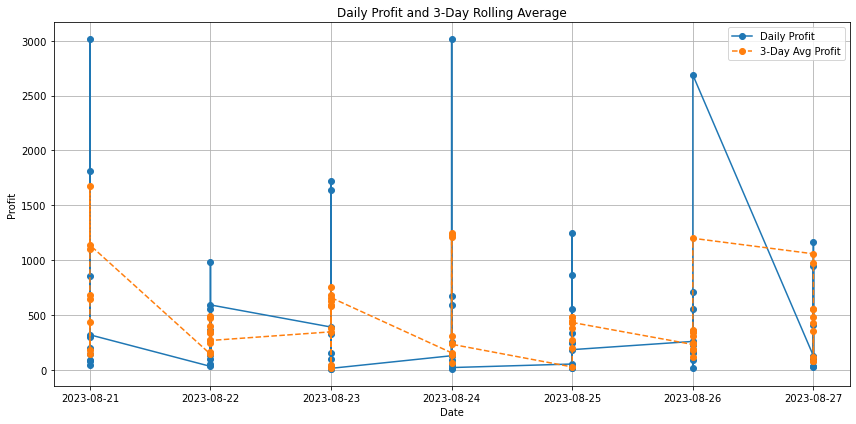

In [124]:
plt.figure(figsize=(12, 6))
plt.plot(data2['Date'], data2['Profit'], label='Daily Profit', marker='o')
plt.plot(data2['Date'], data2['3-Day Avg Profit'], label='3-Day Avg Profit', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Daily Profit and 3-Day Rolling Average')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### 8. Can you optimize the sales process to ensure gross margin is maximized?
    1. Would you fire any vendor?
    2. Would you let go of any customer?

In [126]:
# Calculate the gross profit for each transaction
data['Gross Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']

# 1. Analyzing Vendors
vendor_gross_margin = data.groupby('Firm bought from')['Gross Profit'].sum()
worst_performing_vendor = vendor_gross_margin.idxmin()

# 2. Analyzing Customers
customer_gross_margin = data.groupby('Customer')['Gross Profit'].sum()
worst_performing_customer = customer_gross_margin.idxmin()

print("Worst Performing Vendor:", worst_performing_vendor)
print("Worst Performing Customer:", worst_performing_customer)

Worst Performing Vendor: Vendor8
Worst Performing Customer: Customer3


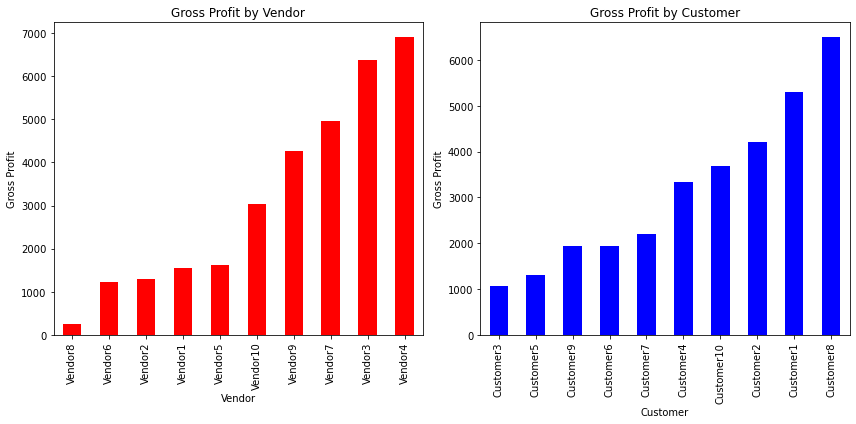

In [127]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
vendor_gross_margin.sort_values(ascending=True).plot(kind='bar', color='red')
plt.title("Gross Profit by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Gross Profit")

plt.subplot(122)
customer_gross_margin.sort_values(ascending=True).plot(kind='bar', color='blue')
plt.title("Gross Profit by Customer")
plt.xlabel("Customer")
plt.ylabel("Gross Profit")

plt.tight_layout()
plt.show()

### 9. To ensure competitive pricing, Ram wants to benchmark their buying and selling prices against the market.Could you calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices? 

In [135]:
# Calculate percentiles for buying and selling prices
percentiles = [25, 50, 75]  
buying_prices = data['Buying price']
selling_prices = data['Selling price']

buying_percentiles = np.percentile(buying_prices, percentiles)
selling_percentiles = np.percentile(selling_prices, percentiles)

print("Buying Price Percentiles:")
for p, percentile in zip(percentiles, buying_percentiles):
    print(f"{p}th Percentile: ${percentile:.2f}")

print("\nSelling Price Percentiles:")
for p, percentile in zip(percentiles, selling_percentiles):
    print(f"{p}th Percentile: ${percentile:.2f}")

Buying Price Percentiles:
25th Percentile: $29.90
50th Percentile: $60.76
75th Percentile: $78.32

Selling Price Percentiles:
25th Percentile: $38.98
50th Percentile: $78.99
75th Percentile: $103.40


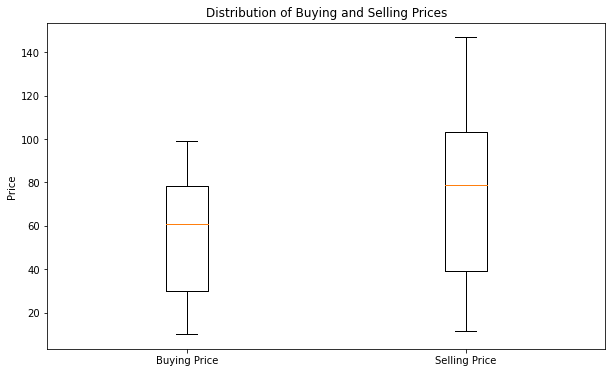

In [136]:
plt.figure(figsize=(10, 6))
plt.boxplot([data2['Buying price'], data2['Selling price']], labels=['Buying Price', 'Selling Price'])
plt.title('Distribution of Buying and Selling Prices')
plt.ylabel('Price')
plt.show()

#### Inferences
#### Buying Price:

The 25th percentile indicates that 25% of the buying prices in your dataset are below 29.9, suggesting that a quarter of your purchases are at a relatively low cost.
The median (50th percentile) buying price is 60.76, indicating that 50% of your purchases are below this price. This serves as a central point for your buying prices.
The 75th percentile shows that 75% of your purchases are below 78.32, which represents a relatively higher buying price.

#### Selling Price:

The 25th percentile for selling price is 38.975, suggesting that 25% of your sales are at a relatively low selling price.
The median (50th percentile) selling price is 78.99, indicating that half of your sales are below this price point.
The 75th percentile is 103.3975, indicating that 75% of your sales are below this selling price, which represents a relatively higher selling price.

### 10. Additionally, analyze how often the Sapota’s prices fall below the 25th percentile or above the 75th percentile, potentially indicating they are buying at a high price or selling at a low price relative to their own transaction history.

In [138]:
# Calculate the 25th and 75th percentiles for buying and selling prices
buying_price_percentiles = np.percentile(data2['Buying price'], [25, 75])
selling_price_percentiles = np.percentile(data2['Selling price'], [25, 75])

below_25th_buying = len(data2[data2['Buying price'] < buying_price_percentiles[0]])

above_75th_buying = len(data2[data2['Buying price'] > buying_price_percentiles[1]])

below_25th_selling = len(data2[data2['Selling price'] < selling_price_percentiles[0]])

above_75th_selling = len(data2[data2['Selling price'] > selling_price_percentiles[1]])

print("Buying Prices Below 25th Percentile:", below_25th_buying, "occurrences")
print("Buying Prices Above 75th Percentile:", above_75th_buying, "occurrences")
print("Selling Prices Below 25th Percentile:", below_25th_selling, "occurrences")
print("Selling Prices Above 75th Percentile:", above_75th_selling, "occurrences")

Buying Prices Below 25th Percentile: 18 occurrences
Buying Prices Above 75th Percentile: 18 occurrences
Selling Prices Below 25th Percentile: 18 occurrences
Selling Prices Above 75th Percentile: 18 occurrences


#### Inferences
#### Buying Prices Below 25th Percentile (18 occurrences):

Sapota is frequently able to secure buying prices that are lower than the 25th percentile of their own transaction history.
This could indicate that Sapota is often making cost-effective purchasing decisions.

#### Buying Prices Above 75th Percentile (18 occurrences):

Sapota is also frequently purchasing products at prices that are above the 75th percentile of their own transaction history.
This suggests that there are instances where Sapota pays a premium for their purchases.

#### Selling Prices Below 25th Percentile (18 occurrences):

Sapota is consistently selling products at prices below the 25th percentile of their own transaction history.
This could imply that they are offering competitive or discounted prices to their customers.

#### Selling Prices Above 75th Percentile (18 occurrences):

There are also instances where Sapota is selling products at prices above the 75th percentile of their own transaction history.
This indicates that they may be able to command higher selling prices for certain products or in specific situations.

### 11. Bharath says that Vendor 4 has to be honored.  What impact does it have on your optimal gross margin? 

In [142]:
current_buying_price = 60.76
vendor4_buying_price = 55.00

current_selling_price = 78.99 
vendor4_selling_price = 78.99

# Calculate the current and proposed gross margin
current_gross_margin = current_selling_price - current_buying_price
vendor4_gross_margin = vendor4_selling_price - vendor4_buying_price

gross_margin_impact = vendor4_gross_margin - current_gross_margin

print("Current Gross Margin: ${:.2f}".format(current_gross_margin))
print("Vendor 4 Gross Margin: ${:.2f}".format(vendor4_gross_margin))
print("Impact on Gross Margin: ${:.2f}".format(gross_margin_impact))

Current Gross Margin: $18.23
Vendor 4 Gross Margin: $23.99
Impact on Gross Margin: $5.76


#### Inference
The current gross margin, based on the existing terms and prices, is 18.23 dollars per unit.
If Vendor 4 proposed terms are accepted, the gross margin would increase to 23.99 dollars per unit.
The impact on the gross margin is a positive 5.76 dollars per unit, which means that honoring Vendor 4 is expected to result in a higher gross margin.

### 12. Which vendor should we have a strategic tie up so that we source only from them (the goal here is to have the highest gross margin)
    - What’s the theoretical max margin the firm could have from that branch?

In [149]:
average_gross_margin = data.groupby('Firm bought from')['Profit'].mean()

# Find the vendor with the highest average gross margin
best_vendor = average_gross_margin.idxmax()
highest_avg_margin = average_gross_margin.max()

print("Vendor with the Highest Average Gross Margin:", best_vendor)
print("Highest Average Gross Margin: ${:.2f}".format(highest_avg_margin))

lowest_buying_price = data[data['Firm bought from'] == best_vendor]['Buying price'].min()

highest_selling_price = data[data['Firm bought from'] == best_vendor]['Selling price'].max()

# Calculate the theoretical maximum gross margin
theoretical_max_margin = highest_selling_price - lowest_buying_price

print("Theoretical Maximum Gross Margin: ${:.2f}".format(theoretical_max_margin))

Vendor with the Highest Average Gross Margin: Vendor9
Highest Average Gross Margin: $27.54
Theoretical Maximum Gross Margin: $75.16


### Inference
#### Vendor with the Highest Average Gross Margin: 
Vendor9 is the vendor with the highest average gross margin, standing at $27.54. This indicates that, on average, Vendor9 provides sapota at a price that allows for the highest profitability for the firm.

#### Theoretical Maximum Gross Margin:
The theoretical maximum gross margin the firm could achieve by sourcing exclusively from Vendor9 is $75.16. This represents the maximum profit margin attainable when buying at the lowest cost and selling at the highest price from Vendor9.

### 13. Given this is the ground truth, what is the price elasticity of Sapota for that branch? (If you increase by Rs.1, how much sales will go up/down and if you decrease price by Rs. 1, how much sales will go up/down) 

In [152]:
# Calculate the total quantity sold and total revenue at the original price
original_quantity_sold = data['Quantity sold'].sum()
original_total_revenue = (data['Quantity sold'] * data['Selling price']).sum()

price_change = 1

new_price = data['Selling price'] + price_change

new_total_revenue = (data['Quantity sold'] * new_price).sum()

percentage_change_in_quantity = ((new_total_revenue - original_total_revenue) / original_total_revenue) * 100

percentage_change_in_price = (price_change / data['Selling price'].mean()) * 100

price_elasticity = percentage_change_in_quantity / percentage_change_in_price

print("Price Elasticity of Sapota:", price_elasticity)

Price Elasticity of Sapota: 0.9814289193935861


#### Inferences:

#### Inelastic Demand: 
A PED value less than 1 indicates inelastic demand. Sapota is a product that is not very responsive to changes in price. This suggests that consumers at the Sai Baba Colony branch are relatively insensitive to price changes when it comes to purchasing Sapota.

#### Revenue Implication: 
If the branch were to increase the price of Sapota by Rs. 1, the quantity sold would decrease by less than 1%, and the total revenue would increase because the percentage decrease in quantity sold is smaller than the percentage increase in price.

#### Pricing Strategy: 
Knowing that the demand is inelastic, the branch can consider increasing the price of Sapota to boost revenue without a significant drop in sales. However, it should be done cautiously, as increasing the price too much might still lead to reduced sales.